### Bibliotēku importēšana

In [136]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### Testēšanas datu importēšana

Sekojošā koda blokā tabulāras testēšanas dati tiek importēti pandas dataFrame struktūra.

Ir iespējams specificēt <b>testēšanas projektu, mapi project_dir,</b> un testēšanas datu failus excel formātā:<b> file_ekspon un file_nelson,</b> no kuriem tiek ņemti testēšanas dati drošuma novertēšanai. file_ekspon - satur testēšanas datus vienkāršam eksponenciālam modelim, bet file_nelson - Nelsona modelim.

In [70]:
path = os.getcwd()

project_dir = 'prog2' 
file_ekspon = 'ld2-prog2-test-dati-ekspon.xlsx'
file_nelson = 'ld2-prog2-test-dati-nelsonam.xlsx'

df_ekspon = pd.read_excel(os.path.join(path, project_dir, file_ekspon))
df_nelson = pd.read_excel(os.path.join(path, project_dir, file_nelson))
print (df_ekspon, df_nelson, sep='\n\n')

   testēšanas posma nr.  posma ilgums (dienas)  kļūdu skaits
0                     1                 0.0830            27
1                     2                 0.0700            11
2                     3                 0.0500             5
3                     4                 0.0400             4
4                     5                 0.0400             3
5                     6                 0.0200             1
6                     7                 0.0095             1
7                     8                 0.0080             2
8                     9                 0.0080             1

    Testa nr.   Kļūdu skaits 
0            1              0
1            2              0
2            3              0
3            4              0
4            5              0
..         ...            ...
85          86              0
86          87              0
87          88              0
88          89              1
89          90              1

[90 rows x 2 columns]


### Datu priekšapstrāde 

Nelsona modelim tiek definēts kopējo testu skaits N un kļūdaino testu skaits N0. Savukārt, eksponenciālam modeļim tabula tiek papīldināta ar kopējo kļūdu skaitu (n) līdz noteiktam laikam (t) un tiek atlasīti sekojoši mainīgie: posmu skaits m, saraksts ar posma ilgumiem t, saraksts n, kas satur kopējo kļūdu skaitu līdz noteiktam laikam t(i)

In [71]:
# Pardefinēt colonnas
df_nelson.columns = ['nr', 'kl_sk']
df_ekspon.columns = ['posma_nr', 't', 'kl_sk']

In [72]:
N = df_nelson.nr.count()
N0 = df_nelson.kl_sk.sum()
print('Priekš nelsona modeļa testu skaits un kļūdaino testu skaits:', N, N0)

df_ekspon['n'] = df_ekspon['kl_sk'].cumsum()
m = df_ekspon.posma_nr.count()
n = df_ekspon['n'].tolist()
t = df_ekspon['t'].tolist()
print('\nPriekš vienkārša eksponenciāla modeļa:\n')
print(df_ekspon)
print('posmu skaits m:', m)

Priekš nelsona modeļa testu skaits un kļūdaino testu skaits: 90 27

Priekš vienkārša eksponenciāla modeļa:

   posma_nr       t  kl_sk   n
0         1  0.0830     27  27
1         2  0.0700     11  38
2         3  0.0500      5  43
3         4  0.0400      4  47
4         5  0.0400      3  50
5         6  0.0200      1  51
6         7  0.0095      1  52
7         8  0.0080      2  54
8         9  0.0080      1  55
posmu skaits m: 9


### Modeļu realizācija

Laboratorijas darba ietvaros tika implementēti divi modeļi: <b>Nelsona modelis</b> un <b>Vienkāršais eksponenciālais modelis</b>. Abu modeļu funkcijas ir dotas Zemāk:
#### 1. Nelsona modelis

Nelsona modelis ir statistiskais drošuma modeļis, kurš pieņem, ka varbūtība, ka programma strādās ar atteicēm ir vienāda ar kļūdaino testu attiecību pret visu izpildītu testu kopu. Līdz ar to bezatteices vārbūtība ir 1 - varbūtība, ka programma strādās ar atteicēm.

In [73]:
def nelsona_drosums(N: '''testu skaits''', N0: '''kļudaino testu skaits'''):
    return 1-N0/N

#### 2. Vienkāršais eksponencialais modeļis

Vienkāršais eksponencialais modeļis pieder pie dinamiskiem diskrētiem drošuma modeļiem un pamatojas uz Dželinska morandes modeļi, kurš bija aprakstīts 1. laboratorijas darbā. Vienkāršais eksponencialais modeļis pieņem, ka 
<li>Kļūdu atklāšanas intensitāte ir proporcionāla palikušo kļūdu skaitam </li>
<li>Kļūdas ir neatkarīgas un tām vienāda varbūtība</li>
<li>Kļūdas ir vienādi svarīgas </li>
<li>Laikam starp atteicēm ir eksponenciāls sadalījums </li>
<li>Kļūdas tiek labotas, neienesot jaunas</li>

In [74]:
def ekspon_drosums(m: '''testēšanas posmu skaits''', n: '''list, laikā ti atrasto kļūdu skaits''', t: '''list, posma laiks '''):
    b = (sum([t[i]*np.log(n[i]) for i in range(m)])) - (1/m)*(sum(np.log(n))*sum(t)) / (sum([ti**2 for ti in t])-(1/m)*sum(t)**2)
    K = -b
    a = (1/m)*sum(np.log(n)) - ((1/m)*sum(t))*b
    N = np.exp(a)/K  # Sākumkļūdu skaits
    t1 = a/K  # Kļūdu rašanās intensitātes samazināšanas laiks (līdz vienai kļūdai laika vienībā)
    R = np.exp([a+b*ti for ti in t])
    return N, R, t1

### Iegūtie rezultāti

### 1. Nelsona modelis

In [75]:
y_nelson = nelsona_drosums(N, N0)
print('Testējāmas programmas statiskais drošums: ', y_nelson)

Testējāmas programmas statiskais drošums:  0.7


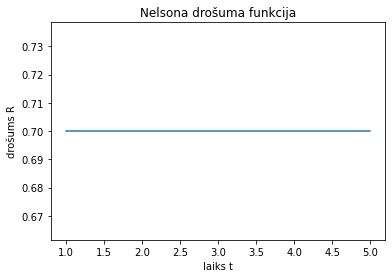

In [145]:
fig, ax = plt.subplots()
y = y_nelson
ax.plot([1, 2, 3, 4, 5], [y, y, y, y, y])
ax.set_xlabel('laiks t')
ax.set_ylabel('drošums R')
ax.set_title('Nelsona drošuma funkcija')
plt.show()

Tā kā statiskie drošuma modeļi nav atkārīgi no laika, to grafiks izskatās, ka taisna linija ar constantu drošuma novertējuma vertību visā programmatūras darbības laikā. 

### 2. Vienkāršais eksponencialais modeļis

In [77]:
N, R, t1 = ekspon_drosums(m, n, t)
print('Sākumkļūdu skaits:', int(N))
print('Drošuma funkcija laikā:\n')
Rt_ekspon_data = [[R[i], t[i]] for i in range(m)]
df_res_Rt_ekspon = pd.DataFrame(Rt_ekspon_data, columns=["R(t)", "t(i)"])
print(df_res_Rt_ekspon)
print('\nKļūdu rašanās intensitātes samazināšanas laiks:', t1)

Sākumkļūdu skaits: 377
Drošuma funkcija laikā:

           R(t)    t(i)
0      0.003497  0.0830
1      0.049389  0.0700
2      2.902292  0.0500
3     22.248264  0.0400
4     22.248264  0.0400
5   1307.393343  0.0200
6  11096.578555  0.0095
7  15061.643099  0.0080
8  15061.643099  0.0080

Kļūdu rašanās intensitātes samazināšanas laiks: 0.055231342605050714


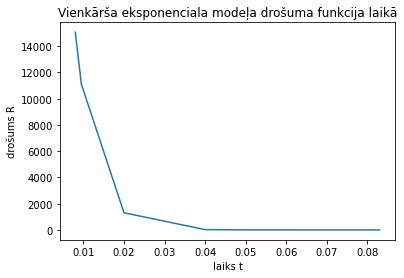

In [131]:
fig, ax = plt.subplots()
ax.plot(t, R)
ax.set_xlabel('laiks t')
ax.set_ylabel('drošums R')
ax.set_title('Vienkārša eksponenciala modeļa drošuma funkcija laikā')
plt.show()

Papildus ir iespējams izvadīt drosuma atkārību no kopējā kļūdu skaita līdz noteiktam laikam, tas ir R atkārīgu no n.

In [79]:
Rn_ekspon_data = [[R[i], n[i]] for i in range(m)]
df_res_Rn_ekspon = pd.DataFrame(Rn_ekspon_data, columns=["R(t)", "n(i)"])
print(df_res_Rn_ekspon)

           R(t)  n(i)
0      0.003497    27
1      0.049389    38
2      2.902292    43
3     22.248264    47
4     22.248264    50
5   1307.393343    51
6  11096.578555    52
7  15061.643099    54
8  15061.643099    55


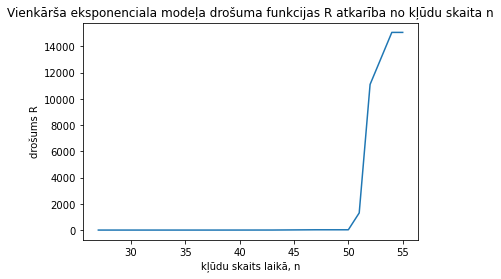

In [80]:
fig, ax = plt.subplots()
ax.plot(n, R)
ax.set_xlabel('kļūdu skaits laikā, n')
ax.set_ylabel('drošums R')
ax.set_title('Vienkārša eksponenciala modeļa drošuma funkcijas R atkarība no kļūdu skaita n')
plt.show()

### Rezultātu salīdzinājums

Sakara ar to, ka ir izvelēts statiksais un dinamiskais drošuma modeļi to savstarpēja salīdzināšana ir apgrūtināma, bet ir iespējams redzet spilgtas atšķirības to rezultātos. Statiskais drosuma modelis dod vienu drošuma raditāju, kas ir atkarīgs no kļūdu un testu skaita. Jo lielāks ir kļūdaino testu skaits, jo mazāka ir programmatūras drošība. Modelis neievero drošuma dinamiku un neprasa skaitīt laiku. 

Savukārt vienkāršais eksponenciālais modeļis saņem plašākus testa datus. Tam ir nepieciešams zināt katra testēšanas posma īlgumu, kurš dota gadījuma ir skaitīts dienās (jo maza t(i) vertība (< 0) dod labākus drošuma rezultātus). Katram posmam, kurš sastāv no vienāda testu skaita, tiek izrēķināts kļūdu skaits un kopējais kļūdu skaits laikā līdz noteikam posmam. Rezultātā, vienkāršais eksponenscialais modelis rēķina drošību atkarība no kopēja kļūdu skaita līdz noteikam posmam un atkārībā no laika, ko aizņem katrs posms.

Aprakstītu dažadību ir iespejams aplukot skaitliskā veidā:

In [86]:
print('Nelsona modeļa drošums:', y_nelson)
print('\nVienkāršā eksponenciālā modeļa drošums:\n', df_res_Rt_ekspon)

Nelsona modeļa drošums: 0.7

Vienkāršā eksponenciālā modeļa drošums:
            R(t)    t(i)
0      0.003497  0.0830
1      0.049389  0.0700
2      2.902292  0.0500
3     22.248264  0.0400
4     22.248264  0.0400
5   1307.393343  0.0200
6  11096.578555  0.0095
7  15061.643099  0.0080
8  15061.643099  0.0080


Savukārt grafiska veidā, pieņēmot, ka Nelsona drošuma funkcija ir konstanta laikā, ir iespējams konstruēt abas funkcijas vienā plaknē, apskatoties, kā tie atšķirās sava starpā:

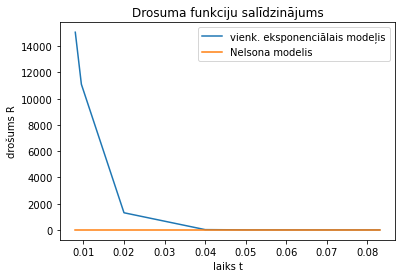

In [89]:
fig, ax = plt.subplots()
ax.plot(t, R)
ax.plot(t, [y_nelson for _ in range(m)])
ax.set_xlabel('laiks t')
ax.set_ylabel('drošums R')
ax.set_title('Drosuma funkciju salīdzinājums')
ax.legend(['vienk. eksponenciālais modeļis', 'Nelsona modelis'])
plt.show()

Eksponencialais modelis izreķināja ļoti lielus skaitļus, kurus var atmest, lai redzetu abu modeļu krustpunktu. Tapēc tika ievēroti pirmie 4 testēšanas posmi un tika sanemt pārskatamaks grafiks:

Tuvakāis t(i)= 0.07 posms(i) = 2
Precīzs laiks: 0.066


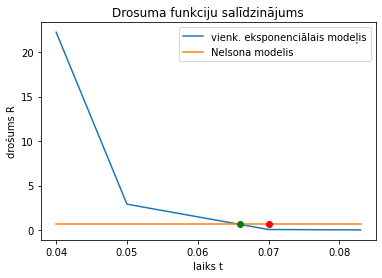

In [144]:
fig, ax = plt.subplots()
x = np.asarray([t[i] for i in range(4)])
f = np.asarray([R[i] for i in range(4)])
g = np.asarray([y_nelson for _ in range(4)])
ax.plot(x, f)
ax.plot(x, g)
ax.set_xlabel('laiks t')
ax.set_ylabel('drošums R')
ax.set_title('Drosuma funkciju salīdzinājums')
ax.legend(['vienk. eksponenciālais modeļis', 'Nelsona modelis'])
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], y_nelson, 'ro')
print('Tuvakāis t(i)=', *x[idx], 'posms(i) =', *idx+1)
# print('Precīzs laiks:', 0.066)
# plt.plot(0.066, y_nelson, 'go')
plt.show()

Redzamais grafiks parāda, ka abi modeli krustojās. Ta kā posma laiks t ir diskrēts (saraksts ar vertībām), pats tuvākāis pie krustošanas punkts ir iezīmēt ar sarkāno krāsu. To vertība ir izvadīta pirms grafika. Precīzu punktu ir iespējams noteit vai nu manuāli spelējoties ar grafiku, vai sadalot laiku t sīkākās daļās. 

### Rezultātu saglabāšana

Dotu dokumentu ar visiem grafikiem un rezultātiem ir iespējams saglabāk vairākos formātos. Nospiežot <b>file -> download as</b> un izvelēties nepieciešamo formātu. Teksta dokumenta iegūsanai ir ieteicāmi <b>.pdf .html</b> formāti. Interaktīvam mainīgam dokumentam <b>.ipynb</b>, koda iegūšanai <b>.py</b>. Ir pieejāmi ari citi saglabašanas formāti.